In [1]:
import cv2
import os
import shutil
import itertools

In [2]:
from skimage.io import imread_collection
import glob
#your path 
yes_dir = glob.glob('C:/git/obrazyMRI/data/brain_tumor_dataset/yes/*')
no_dir =glob.glob('C:/git/obrazyMRI/data/brain_tumor_dataset/no/*')

In [3]:
import os
for i in range(0, len(yes_dir)):
    os.rename(yes_dir[i], 'C:/git/obrazyMRI/data/brain_tumor_dataset/yes\\yes_' + str(i+1) + '.jpg')
for i in range(0, len(no_dir)):
    os.rename(no_dir[i], 'C:/git/obrazyMRI/data/brain_tumor_dataset/no\\no_' + str(i+1) + '.jpg')

In [4]:
yes_dir = glob.glob('C:/git/obrazyMRI/data/brain_tumor_dataset/yes/*')
no_dir =glob.glob('C:/git/obrazyMRI/data/brain_tumor_dataset/no/*')

In [5]:
import os

# define the name of the directory to be created
path = ["C:/git/obrazyMRI/data/TEST/YES","C:/git/obrazyMRI/data/TEST/NO", "C:/git/obrazyMRI/data/TRAIN/YES",
       "C:/git/obrazyMRI/data/TRAIN/NO", "C:/git/obrazyMRI/data/VAL/YES", "C:/git/obrazyMRI/data/VAL/NO"]
for i in path:
    try:
        os.makedirs(i)
    except OSError:
        print ("Creation of the directory %s failed" % i)
    else:
        print ("Successfully created the directory %s" % i)

Successfully created the directory C:/git/obrazyMRI/data/TEST/YES
Successfully created the directory C:/git/obrazyMRI/data/TEST/NO
Successfully created the directory C:/git/obrazyMRI/data/TRAIN/YES
Successfully created the directory C:/git/obrazyMRI/data/TRAIN/NO
Successfully created the directory C:/git/obrazyMRI/data/VAL/YES
Successfully created the directory C:/git/obrazyMRI/data/VAL/NO


In [6]:
from math import *
import numpy as np
yes_test=np.random.choice(yes_dir, size=5, replace=False)
for i in yes_test:
    shutil.copy(i, "C:/git/obrazyMRI/data/TEST/YES" )
yes_dir=list(set(yes_dir)-set(yes_test))
yes_train=np.random.choice(yes_dir, size=floor(0.8*len(yes_dir)), replace=False)
for i in yes_train:
    shutil.copy(i, "C:/git/obrazyMRI/data/TRAIN/YES" )
yes_val=list(set(yes_dir)-set(yes_train))
for i in yes_val:
    shutil.copy(i, "C:/git/obrazyMRI/data/VAL/YES" )

In [7]:
from math import *
no_test=np.random.choice(no_dir, size=5, replace=False)
for i in no_test:
    shutil.copy(i, "C:/git/obrazyMRI/data/TEST/NO" )
no_dir=list(set(no_dir)-set(no_test))
no_train=np.random.choice(no_dir, size=floor(0.8*len(no_dir)), replace=False)
for i in no_train:
    shutil.copy(i, "C:/git/obrazyMRI/data/TRAIN/NO" )
no_val=list(set(no_dir)-set(no_train))
for i in no_val:
    shutil.copy(i, "C:/git/obrazyMRI/data/VAL/NO" )

In [8]:
import numpy as np
from random import shuffle
from keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder

yes_train=list(yes_train)
no_train=list(no_train)
yes_val=list(yes_val)
no_val=list(no_val)
yes_test=list(yes_test)
no_test=list(no_test)

train_files = yes_train + no_train
val_files = yes_val + no_val
test_files = yes_test + no_test

shuffle(train_files)

IMG_DIM = (64, 64)
x_train = np.array([img_to_array(load_img(image_file, target_size=IMG_DIM)) for image_file in train_files])
x_val = np.array([img_to_array(load_img(image_file, target_size=IMG_DIM)) for image_file in val_files])
x_test = np.array([img_to_array(load_img(image_file, target_size=IMG_DIM)) for image_file in test_files])

x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)

x_train.astype('float64')
x_train /= 255.0
x_val.astype('float64')
x_val /= 255.0
x_test.astype('float64')
x_test /= 255.0

train_labels = [fn.split('/')[-1].split('_')[0].strip() for fn in train_files]
val_labels = [fn.split('/')[-1].split('_')[0].strip() for fn in val_files]
test_labels = [fn.split('/')[-1].split('_')[0].strip() for fn in test_files]

le = LabelEncoder()
le.fit(train_labels)

y_train = le.transform(train_labels)
y_val = le.transform(val_labels)
y_test = le.transform(test_labels)


Using TensorFlow backend.


In [9]:
from keras.preprocessing.image import ImageDataGenerator
demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

In [10]:
os.mkdir('pokazac')
x = x_train[0]  
x = x.reshape((1,) + x.shape) 

i = 0
for batch in demo_datagen.flow(x, batch_size=1, save_to_dir='pokazac', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:
        break

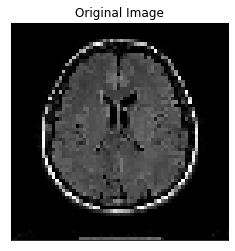

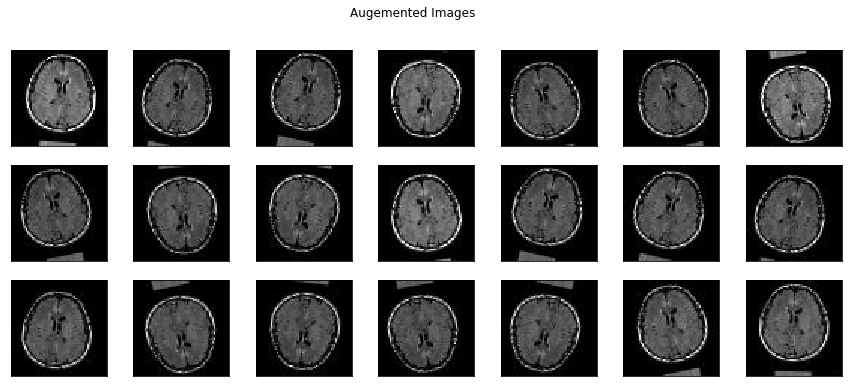

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('pokazac/'):
    img = cv2.cv2.imread('pokazac/' + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 3*7:
        break
plt.suptitle('Augemented Images')
plt.show()

In [12]:
from keras.applications.vgg16 import VGG16, preprocess_input
TRAIN_DIR = 'C:/git/obrazyMRI/data/TRAIN/'
VAL_DIR = 'C:/git/obrazyMRI/data/VAL/'
RANDOM_SEED= 123
IMG_SIZE = (64, 64)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)


train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=50,
    class_mode='binary',
    seed=RANDOM_SEED
)


val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    color_mode='rgb',
    target_size=IMG_SIZE,
    batch_size=50,
    class_mode='binary',
    seed=RANDOM_SEED
)

Found 194 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


In [13]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

batch_size = 50
num_classes = 2
epochs = 50
input_shape = (64, 64, 3)

model = Sequential(name='basic cnn with Augmentation model')

model.add(Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.45))

model.add(Conv2D(filters=16,kernel_size=9, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=36,kernel_size=9, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(), metrics=['accuracy'])

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        3904      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        20752     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
__________________________________________________________

In [14]:
history = model.fit_generator(train_generator, steps_per_epoch=50, epochs=50,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)




Epoch 1/50





50/50 [==============================] - 82s 2s/step - loss: 0.8327 - acc: 0.6493 - val_loss: 0.4715 - val_acc: 0.7551
Epoch 2/50
50/50 [==============================] - 89s 2s/step - loss: 0.5675 - acc: 0.7357 - val_loss: 0.4773 - val_acc: 0.7959
Epoch 3/50
50/50 [==============================] - 90s 2s/step - loss: 0.5452 - acc: 0.7596 - val_loss: 0.4889 - val_acc: 0.7959
Epoch 4/50
50/50 [==============================] - 89s 2s/step - loss: 0.5125 - acc: 0.7719 - val_loss: 0.4691 - val_acc: 0.7959
Epoch 5/50
50/50 [==============================] - 89s 2s/step - loss: 0.4948 - acc: 0.7700 - val_loss: 0.4924 - val_acc: 0.7755
Epoch 6/50
50/50 [==============================] - 89s 2s/step - loss: 0.4786 - acc: 0.7836 - val_loss: 0.4850 - val_acc: 0.7959
Epoch 7/50
50/50 [==============================] - 88s 2s/step - loss: 0.4566 - acc: 0.7837 - val_loss: 0.4513 - val_acc: 0.7755
Epoch 8/50
50/50 [==============================] - 89s 2s/step - loss: 0.4468 - a

50/50 [==============================] - 88s 2s/step - loss: 0.0908 - acc: 0.9722 - val_loss: 0.6884 - val_acc: 0.8367


In [15]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.699999988079071


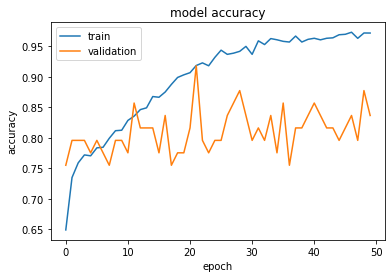

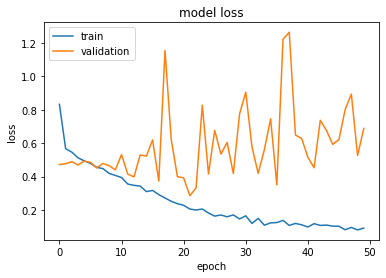

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()